# Project 2: Moneyball
Name: Dan Ellsworth <br>
Date: 9 November 2020

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import itertools

## Part 1: Wrangling


### Problem 1: 
We compute a relation containing the total payroll and winning percentage by using the following SQL query:

> SELECT franchID, Teams.yearID, W, G, sum(salary) as total_payroll, 100*CAST(W AS float)/CAST(G AS float) as win_percentage <br>
FROM Teams, Salaries <br>
WHERE Teams.yearID = Salaries.yearID AND Teams.teamID = Salaries.teamID AND Teams.yearID >= 1990 <br> GROUP BY Teams.teamID, Teams.yearID

I decided to use an inner join that I implemented using the WHERE condition. Thus, where the yearId and the teamID match the other table, the selected information is joined into one table. This reduces the possibility of null values because both tables have to contain these two values. For this reason, there are no null values in the table after we run this query. Before we run the query, there are missing values in the Teams table but not the Salaries table - again, this is why we must use the inner join to prevent null values.


<br>

Note: In the query below, I left all table declarations (i.e. Teams.franchID). This is redundant because the Salaries table does not have a variable called franchID, W, or G. However, it helps me understand which table the information is coming from.

In [2]:
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

# SQL queries for everything in each table
teams = "SELECT * FROM Teams"
salaries = "SELECT * FROM Salaries"

# query search for the two tables
salarytable = pd.read_sql(salaries, conn)
teamstable = pd.read_sql(teams, conn)

# print out the # of rows that contain null values for each table
print('Rows with null values in Salaries table: ' + str((len(salarytable)) - len(salarytable.dropna())))
print('Rows with null values in Teams table: ' + str((len(teamstable)) - len(teamstable.dropna())) + '\n')

# Query for question 1
win_percent_query = 'SELECT Teams.franchID, Teams.yearID, Teams.W, Teams.G, sum(Salaries.salary) as total_payroll, 100*CAST(W AS float)/CAST(G AS float) as win_percentage \
FROM Teams, Salaries \
WHERE Teams.yearID = Salaries.yearID AND Teams.teamID = Salaries.teamID AND Teams.yearID >= 1990 \
GROUP BY Teams.teamID, Teams.yearID'

# read data using query
team_win_pct = pd.read_sql(win_percent_query, conn)

# display the head of DF
print(team_win_pct.head())

# Display data from the Chicago Cubs
team_win_pct[team_win_pct.franchID == 'CHC']

Rows with null values in Salaries table: 0
Rows with null values in Teams table: 2325

  franchID  yearID   W    G  total_payroll  win_percentage
0      ANA    1997  84  162     31135472.0       51.851852
1      ANA    1998  85  162     41281000.0       52.469136
2      ANA    1999  70  162     55388166.0       43.209877
3      ANA    2000  82  162     51464167.0       50.617284
4      ANA    2001  75  162     47535167.0       46.296296


,franchID,yearID,W,G,total_payroll,win_percentage
132,CHC,1990,77,162,13624000.0,47.530864
133,CHC,1991,77,160,23175667.0,48.125000
134,CHC,1992,78,162,29829686.0,48.148148
135,CHC,1993,84,163,39386666.0,51.533742
136,CHC,1994,49,113,36287333.0,43.362832
137,CHC,1995,73,144,29505834.0,50.694444
138,CHC,1996,76,162,33081000.0,46.913580
139,CHC,1997,68,162,42155333.0,41.975309
140,CHC,1998,90,163,50838000.0,55.214724
141,CHC,1999,67,162,62343000.0,41.358025


## Part 2: Exploratory Data Analysis

### Payroll Distribution

#### Problem 2:
First, we produce a box plot that illustrates the distribution of payrolls across teams conditioned on time (from 1990-2014).Then we make a scatter plot that shows winning percentage as a function of total payroll. That is, the total payroll on the x-axis and win percentage is on the y axis.


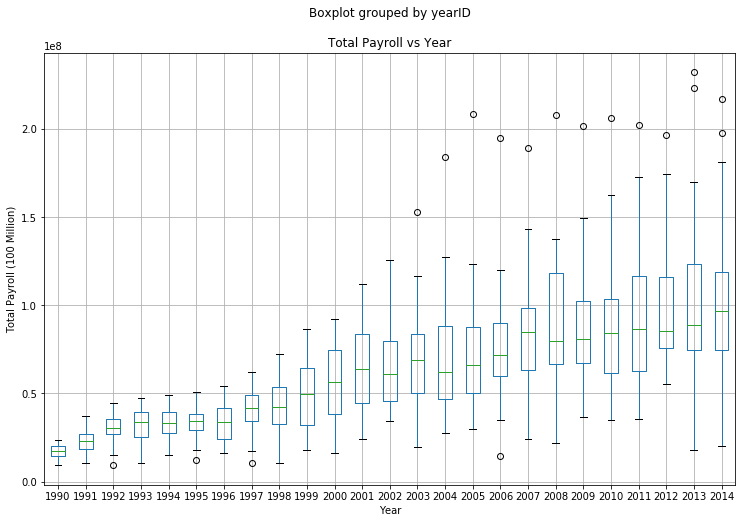

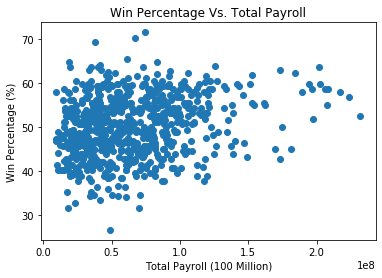

In [3]:
# create box plot of total payroll over the years
team_win_pct.boxplot(column = 'total_payroll' , by = 'yearID', figsize = (12, 8))
plt.xlabel('Year')
plt.ylabel('Total Payroll (100 Million)')
plt.title('Total Payroll vs Year')
plt.show()

# create a scatter plot win_pct vs. payroll
plt.scatter(team_win_pct.total_payroll,team_win_pct.win_percentage)
plt.xlabel('Total Payroll (100 Million)')
plt.ylabel('Win Percentage (%)')
plt.title('Win Percentage Vs. Total Payroll')
plt.show()

#### Question 1

What statements can you make about the distribution of payrolls conditioned on time based on these plots? Remember you can make statements in terms of central tendency, spread, and other statistics discussed in class.

>The payroll distribution's central tendency drastically changes over time. In the 1990's, it appears to have a relatively normal distribution (no skew). However, we can notice the skew begins to shift to the right over time, especially when outliers lie way above the range of payrolls. The maximum payroll is steadily increasing throughout the years, but the minimum payroll only slightly increases over the 14-year timeframe.

#### Problem 3

In Question 1, we stated the payroll distribution drastically changes over time. We can make plots to show how the the central tendency changes over the years:

>The first plot shows the central tendency of payroll from 1990-1994. We notice the mean and median are almost the exact same indicating a relatively normal distribution. Conversely, in the second graph, we see the central tendency of payroll from 2010-2014, and the distribution is clearly shifted to the right (the mean and median are both to the right of the mode). In modern baseball, a few teams are paying way more than the mode which shifts the mean and median to the right. Note that the different colors represent different years in that time period.

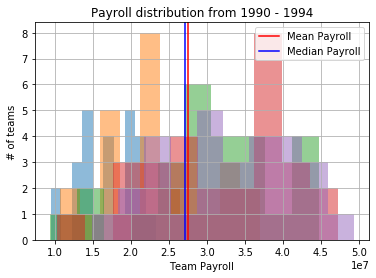

In [4]:
years = np.arange(1990,1995)

for year in years:
    team_win_pct[team_win_pct['yearID'] == year].total_payroll.hist(bins = 10, alpha = .5);

# calculate the mean and median for the specified years
mean = team_win_pct[team_win_pct.yearID.isin(years)].total_payroll.mean()
median = team_win_pct[team_win_pct.yearID.isin(years)].total_payroll.median()

# plot our histogram with two vertical lines indicating the mean and median
plt.axvline(x= mean, c = 'r', label = 'Mean Payroll')
plt.axvline(x= median, c = 'b', label = 'Median Payroll')
plt.xlabel('Team Payroll')
plt.ylabel('# of teams')
plt.title('Payroll distribution from 1990 - 1994')
plt.legend();
plt.plot();

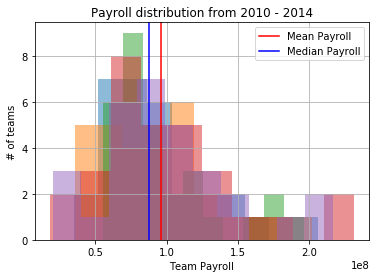

In [5]:
# define range of years 
years = np.arange(2010,2015)

# for each year, plot the total_payroll distribution and calculate the mean 
for year in years:
    team_win_pct[team_win_pct['yearID'] == year].total_payroll.hist(bins = 10, alpha = .5);

# calculate the mean and median for the specified years
mean = team_win_pct[team_win_pct.yearID.isin(years)].total_payroll.mean()
median = team_win_pct[team_win_pct.yearID.isin(years)].total_payroll.median()

# plot our histogram with two vertical lines indicating the mean and median
plt.axvline(x= mean, c = 'r', label = 'Mean Payroll')
plt.axvline(x= median, c = 'b', label = 'Median Payroll')
plt.xlabel('Team Payroll')
plt.ylabel('# of teams')
plt.title('Payroll distribution from 2010 - 2014')
plt.legend();
plt.plot();

### Correlation Between Payroll and Winning Percentage

#### Problem 4:
We discretize year into five time periods (using [pandas.cut](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html) to accomplish this) and then make a set of scatter plots showing mean winning percentage (y-axis) vs. mean payroll (x-axis) for each of the five-time periods. We also add a regression line (using [SciPy linregress](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html)) in each of the 5 scatter plots to ease interpretation. Each point is annotated based on franchise ID.


In [6]:
# function that annotates points on graph
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y}, axis=1) # combine x and y values to one df
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(i)) # plot text at x,y with text i - index value (team)

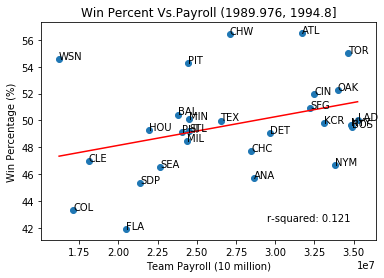

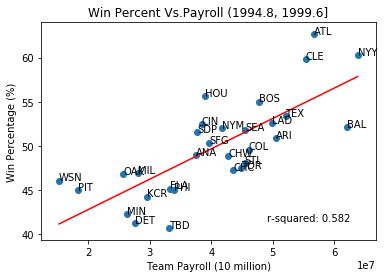

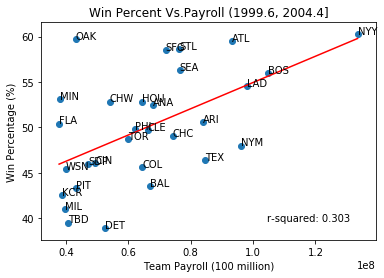

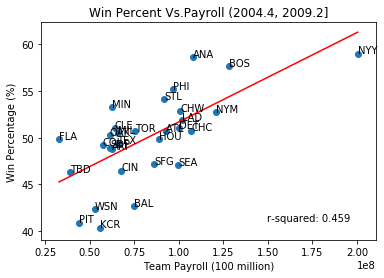

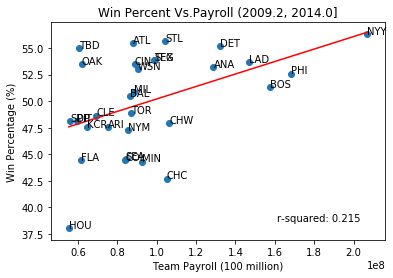

In [7]:
# cut df into 5 equal time periods
periods = pd.cut(team_win_pct.yearID, 5)
team_win_pct['Era'] = periods

# group the team_win_pct dataframe by era column
group_era = team_win_pct.groupby('Era')

# create list to hold data frame for each era
eras = []
# for each group, append the group (as a dataframe) to the eras list
for key, item in group_era:
    eras.append((group_era.get_group(key)))

for era in eras:
    # calculate mean payroll and mean win % by team
    avg_team_payroll = era.groupby('franchID').total_payroll.mean()
    avg_team_win_pct = era.groupby('franchID').win_percentage.mean()
    
    # calculate linear regression based on x and y values
    slope, intercept, r_value, p_value, std_err = stats.linregress(avg_team_payroll, avg_team_win_pct)
    x = np.linspace(avg_team_payroll.min(), avg_team_payroll.max(), 100) # make x values length of x axis (min to max payroll)
    y = slope*x + intercept # calculate y values given x values
    
    fig, ax = plt.subplots() # initialize plots
    ax.plot(x, y, '-r') # plot linear regression line based on calculated values
    ax.text(0.8,0.1, s = "r-squared: "+ "%.3f"%(r_value**2), ha='center', va='center', transform=ax.transAxes) # add r^2 text
    ax.scatter(avg_team_payroll, avg_team_win_pct) # scatter plot
    # specify the units of payroll (x-axis) depending on what the max payroll is for the era
    if (era['total_payroll'].max() >= 100000000):
        scale = '(100 million)'   
    else:
        scale = '(10 million)'
    ax.set_xlabel('Team Payroll ' + scale) # add label based on payroll scale
    ax.set_ylabel('Win Percentage (%)')
    ax.set_title('Win Percent Vs.Payroll ' + str(era['Era'].iloc[0])) # add year range to title of graph
    label_point(avg_team_payroll, avg_team_win_pct, pd.Series(avg_team_payroll.index), ax)
    plt.show()

#### Question 2
What can you say about team payrolls across these periods? Are there any teams that standout as being particularly good at paying for wins across these time periods? What can you say about the Oakland A's spending efficiency across these time periods and specifically in the Moneyball period of 2000-2005.

>The Oakland A's were particularly efficient during the Moneyball years (2000-2005) - winning roughly 60% of their games, just shy of the Yankees, but only having an average payroll of 45 million dollars vs. the Yankee's 120+ million. The Tampa Bay Rays have only been in the league since 1998 and have seen steady improvement since - outperforming even the A's from 2010 - 2014 and doing it with a lower average payroll.

## Part 3: Data Transformations

### Standardizing Across Years

It looks like comparing payrolls across years is problematic so let's do a transformation that will help with these comparisons.


#### Problem 5

We create a new variable in our dataset that standardizes payroll conditioned on year. For this we will compute the [Z-score of the variables](https://en.wikipedia.org/wiki/Standard_score). So, this column for team `i` in year `j` should equal:


>![](figs/prob5_alternate.png)

Where <em>avg\_payroll<sub>j</sub></em> is the average payroll for year `j`, and <em>s<sub>j</sub></em> is the standard deviation of payroll for year `j`.




In [8]:
# group by yearID - since we need the avg payroll and standard deviation of payroll for each year
group = team_win_pct.groupby(['yearID'], as_index = False)

# create list to hold data frame for each years data
years = []
# for each group, append the group (as a dataframe) to the years list
for key, item in group:
    years.append((group.get_group(key)))

# create a list to hold zscores for every team each year
z_score = []

# for each year DF, calculate the standardized payroll and append this Series to the zscore list
for year in years:
   z_score.append((year.total_payroll - year.total_payroll.mean()) / year.total_payroll.std()) # append zscore series

# combine all zscore series (one for each year of data) and convert to dataframe
total_zscore = pd.concat(z_score).to_frame()
total_zscore.rename(columns={"total_payroll":"std_payroll"},inplace=True) # rename the column

# merge zscores with the original dataframe where the index matches
team_win_pct = team_win_pct.merge(total_zscore, how='inner', left_index = True, right_index=True)
team_win_pct.head() # print table with new standard deviation payroll

,franchID,yearID,W,G,total_payroll,win_percentage,Era,std_payroll
0,ANA,1997,84,162,31135472.0,51.851852,"(1994.8, 1999.6]",-0.698639
1,ANA,1998,85,162,41281000.0,52.469136,"(1994.8, 1999.6]",-0.086369
2,ANA,1999,70,162,55388166.0,43.209877,"(1994.8, 1999.6]",0.271410
3,ANA,2000,82,162,51464167.0,50.617284,"(1999.6, 2004.4]",-0.190214
4,ANA,2001,75,162,47535167.0,46.296296,"(1999.6, 2004.4]",-0.721244


#### Problem 6
Now we recreate the plots from problem 4, but now we use the new standardized payroll variable. The result is the following:


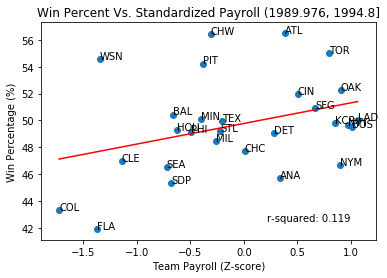

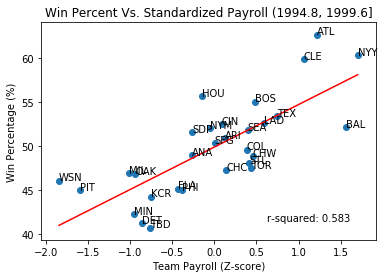

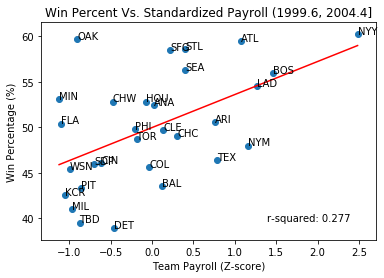

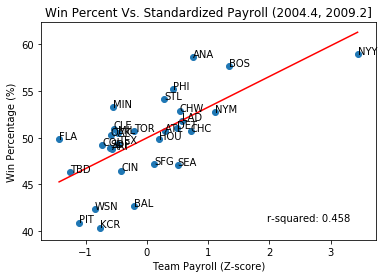

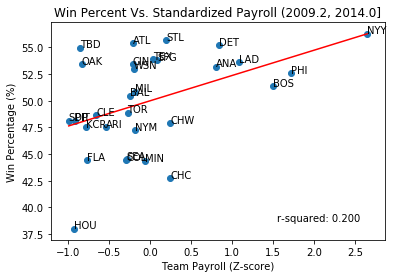

In [12]:
# group the team_win_pct dataframe by era column
group_era = team_win_pct.groupby('Era')

# create list to hold data frame for each era
eras = []
# for each group, append the group (as a dataframe) to the eras list
for key, item in group_era:
    eras.append((group_era.get_group(key)))

for era in eras:
    # calculate mean payroll and mean win % by team
    avg_team_payroll = era.groupby('franchID').std_payroll.mean()
    avg_team_win_pct = era.groupby('franchID').win_percentage.mean()
    
    # calculate linear regression based on x and y values
    slope, intercept, r_value, p_value, std_err = stats.linregress(avg_team_payroll, avg_team_win_pct)
    x = np.linspace(avg_team_payroll.min(), avg_team_payroll.max(), 100) # make x values length of x axis (min to max payroll)
    y = slope*x + intercept # calculate y values given x values
    
    # plot the figure with annotations
    fig, ax = plt.subplots()
    ax.plot(x, y, '-r')
    ax.text(0.8,0.1, s = "r-squared: "+ "%.3f"%(r_value**2), ha='center', va='center', transform=ax.transAxes)
    ax.scatter(avg_team_payroll, avg_team_win_pct)
    ax.set_xlabel('Team Payroll (Z-score)')
    ax.set_ylabel('Win Percentage (%)')
    ax.set_title('Win Percent Vs. Standardized Payroll ' + str(era['Era'].iloc[0])) # add year range to title of graph
    label_point(avg_team_payroll, avg_team_win_pct, pd.Series(avg_team_payroll.index), ax)
    plt.show()

#### Question 3

Discuss how the plots from Problem 4 and Problem 6 reflect the transformation you did on the payroll variable.  Specifically, what is easier to see, what is harder to see?  Are any relationships more apparent?

>It is much easier to compare data from different eras when using the z-score transformation. In the original graphs, a viewer may mistakenly think the units for all the eras are the same, but the earlier eras payrolls are represented in 10 million dollar increments and the later eras use units of 100 million dollars. However, transforming the data makes it difficult to understand how much money a team is actually spending on payroll because the units are no longer in dollars. The r^2 value of the linear regression tells us the z-score data does not fit the regression model quite as well. However, the relationship between eras is much more apparent when using the transformed data.

### Expected Wins

It's hard to see global trends across time periods using these multiple plots, but now that we have standardized payrolls across time, we can look at a single plot showing correlation between winning percentage and payroll across time.


#### Problem 7

We create a scatter plot that displays winning percentage (y-axis) vs. standardized payroll (x-axis). Based on this plot (displayed below), we observe teams that spend roughly the average payroll in a given year will win 50% of their games (i.e. win\_pct is 50 when standardized\_payroll is 0), and teams increase 5% wins for every 2 standard units of payroll (i.e., win\_pct is 55 when standardized\_payroll is 2). 

From these observations we can calculate the expected win percentage for team `i` in year `j` as:

>![](figs/prob7.png)


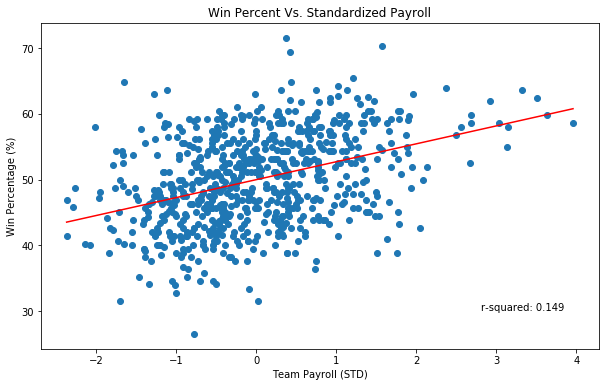

,franchID,yearID,W,G,total_payroll,win_percentage,Era,std_payroll,expected_win_pct,efficiency
0,ANA,1997,84,162,31135472.0,51.851852,"(1994.8, 1999.6]",-0.698639,48.253402,3.598450
1,ANA,1998,85,162,41281000.0,52.469136,"(1994.8, 1999.6]",-0.086369,49.784077,2.685059
2,ANA,1999,70,162,55388166.0,43.209877,"(1994.8, 1999.6]",0.271410,50.678524,-7.468647
3,ANA,2000,82,162,51464167.0,50.617284,"(1999.6, 2004.4]",-0.190214,49.524464,1.092820
4,ANA,2001,75,162,47535167.0,46.296296,"(1999.6, 2004.4]",-0.721244,48.196891,-1.900595


In [13]:
# initialize figure size
fig= plt.figure(figsize=(10,6))

plt.scatter(team_win_pct.std_payroll, team_win_pct.win_percentage)
plt.xlabel('Team Payroll (STD)')
plt.ylabel('Win Percentage (%)')
plt.title('Win Percent Vs. Standardized Payroll')

# calculate linear regression based on x and y values
slope, intercept, r_value, p_value, std_err = stats.linregress(team_win_pct.std_payroll, team_win_pct.win_percentage)
x = np.linspace(team_win_pct.std_payroll.min(), team_win_pct.std_payroll.max(), 100) # make x values length of x axis (min to max payroll)
y = slope*x + intercept # calculate y values given x values
plt.plot(x, y, '-r', label='y=2x+1')
plt.text(1.4,0.2, s = "r-squared: "+ "%.3f"%(r_value**2), ha='center', va='center', transform=ax.transAxes)
plt.show()

# calculate expected win percentage
team_win_pct['expected_win_pct'] =  50 + (2.5 * team_win_pct.std_payroll)
team_win_pct.head() # plot head of table with new expected_win_pct variable
    

### Spending Efficiency

Using this result, we can now create a single plot that makes it easier to compare teams efficiency. The idea is to create a new measurement unit for each team based on their winning percentage and their expected winning percentage that we can plot across time summarizing how efficient each team is in their spending.


#### Problem 8

We compute a new variable called efficiency, given by:

>![](figs/prob8.png)

for team `i` in year `j`, where `expected_win_pct` is given above.

Finally we display a line plot with year on the x-axis and efficiency on the y-axis using the following teams of interest: Oakland, the New York Yankees, Boston, Atlanta and Tampa Bay (franchIDs: OAK, BOS, NYY, ATL, TBD).

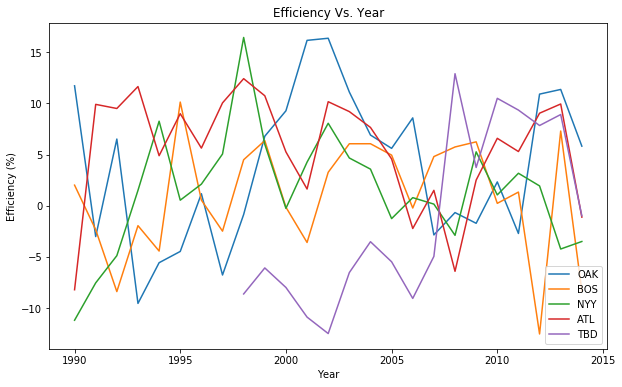

In [14]:
# calculate teams efficiency and add values to efficiency column
team_win_pct['efficiency'] = team_win_pct.win_percentage - team_win_pct.expected_win_pct

# specify the teams we are interested in ploting
teams = ['OAK','BOS','NYY','ATL','TBD']

# initialize figure size
fig= plt.figure(figsize=(10,6))

for team in teams:
    # for each team, plot that teams year vs efficiency
    plt.plot(team_win_pct[team_win_pct['franchID']== team].yearID, team_win_pct[team_win_pct['franchID']== team].efficiency, label = team)

# show plot of all teams effeciency
plt.title('Efficiency Vs. Year')
plt.xlabel('Year')
plt.ylabel('Efficiency (%)')
plt.legend()
plt.show()


#### Question 4

What can you learn from this plot compared to the set of plots you looked at in Question 2 and 3? How good was Oakland's efficiency during the Moneyball period?

>This plot shows the trends of teams' efficiency over time, where the other plots are focused on the relationship between winning and having high payrolls. Oakland is particularly efficient during the Moneyball years; in fact, they are the most efficient team recorded on our chart (it seems like the book/movie was not exaggerating).